In [1]:
from agents import Producer, Consumer, Influencer
from content_market import ContentMarket
import numpy as np
from test import test

In [2]:
topics = np.array([[1, 10]])

In [3]:
from util import exponential_decay, inverse_decay, tanh_decay
import matplotlib.pyplot as plt
import visualize

In [4]:
varied_param = 'consumer_topic_func'
varied_param_legend_label = 'Consumer Topic Function Shallowness'
varied_param_x_label = 'Consumer Topic Function Shallowness'

In [5]:
num_producers = 6
num_influencers = 1
num_consumers = 5

In [6]:
function_mults = list(np.linspace(0.1, 20, 30))
functions = []
def get_fun(mult):
    return lambda x: inverse_decay(x, mult, 2)
for function_mult in function_mults:
    functions.append(get_fun(function_mult))

In [7]:
stats, markets, tests = test(
    topics=topics,
    varied_param=varied_param,
    num_producers=num_producers,
    num_consumers=num_consumers,
    num_influencers=num_influencers,
    producer_topic_func=lambda x: inverse_decay(x, 15, 2),
    consumer_topic_func=functions,
    consumer_attention_bound=10,
    consumer_external_interest_prob=0.5,
    consumer_delay_sensitivity=1,
    influencer_attention_bound=20,
    influencer_delay_sensitivity=1,
    init_following_rates_method='equal',
    init_interest_method='even',
    production_rate=1,
    external_production_rate=1,
    producer_type=Producer,
    consumer_type=Consumer,
    influencer_type=Influencer,
)

Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 0 / 100 done.
Total Social Welfare: 14.548658819762947
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimizing consumer 10
Optimizing consumer 11
Optimizing influencer 6
Optimizing producer 0
Optimizing producer 1
Optimizing producer 2
Optimizing producer 3
Optimizing producer 4
Optimizing producer 5
Iteration 1 / 100 done.
Total Social Welfare: 20.260592666643895
Consumer rate change: 1.3290489172717526
Consumer utility change: 0.698150448397773
Influencer rate change: 3.4704172540879283
Influencer utility change: 1.5464801009005695
Producer topic change: 6.66515242454165e-05
Producer utility change: 0.11245025066525227
Optimizing consumer 7
Optimizing consumer 8
Optimizing consumer 9
Optimi

In [8]:
print(stats)

{'total_social_welfare': [[0, 14.548658819762947, 20.260592666643895, 20.46145305095801, 20.46155126173569, 20.461551297040845], [0, 20.941311307924536, 22.893063039652215, 22.900544483136734, 22.900541860650527, 22.90054200800305], [0, 24.501327377280884, 25.40719595442183, 25.410629400554587, 25.41068747893516, 25.410689481945134], [0, 27.119585761076763, 27.582717445441528, 27.587237480778178, 27.587401608786536, 27.58742350539969], [0, 29.28322922649202, 29.678564797053784, 29.68681800104361, 29.687291049793537, 29.68733706793257, 29.687340240005557], [0, 31.103695389878986, 31.387370242145693, 31.394088332754457, 31.394475334398994, 31.39448182307559, 31.394484440440735, 31.394487674299974], [0, 32.79376771786209, 33.086108142854975, 33.091033024990615, 33.09131348897283, 33.09135602257898, 33.091364837740265], [0, 34.282110202593216, 34.59869893987863, 34.60319201221417, 34.60340626581125, 34.6034187995881], [0, 35.60723712285111, 35.94840107193685, 35.95263926432747, 35.95279638

In [9]:
print(tests)

{'consumer_topic_func': [<function get_fun.<locals>.<lambda> at 0x117b9f7f0>, <function get_fun.<locals>.<lambda> at 0x117b9f880>, <function get_fun.<locals>.<lambda> at 0x117b9f910>, <function get_fun.<locals>.<lambda> at 0x117b9f9a0>, <function get_fun.<locals>.<lambda> at 0x117b9fa30>, <function get_fun.<locals>.<lambda> at 0x117b9fac0>, <function get_fun.<locals>.<lambda> at 0x117b9fb50>, <function get_fun.<locals>.<lambda> at 0x117b9fbe0>, <function get_fun.<locals>.<lambda> at 0x117b9fc70>, <function get_fun.<locals>.<lambda> at 0x117b9fd00>, <function get_fun.<locals>.<lambda> at 0x117b9fd90>, <function get_fun.<locals>.<lambda> at 0x117b9fe20>, <function get_fun.<locals>.<lambda> at 0x117b9feb0>, <function get_fun.<locals>.<lambda> at 0x117b9ff40>, <function get_fun.<locals>.<lambda> at 0x117bb4040>, <function get_fun.<locals>.<lambda> at 0x117bb40d0>, <function get_fun.<locals>.<lambda> at 0x117bb4160>, <function get_fun.<locals>.<lambda> at 0x117bb41f0>, <function get_fun.<lo

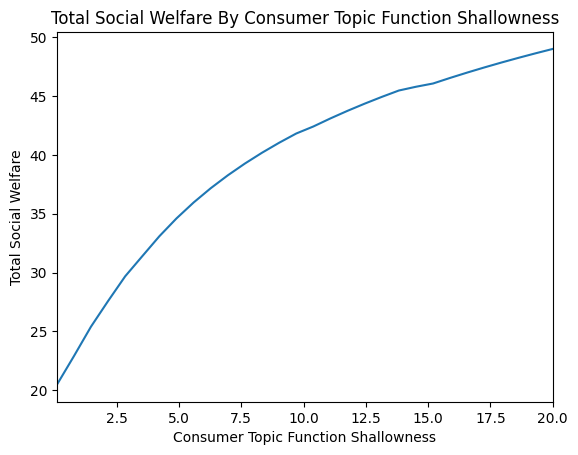

In [10]:
visualize.plot_ending_value_by_test(f"Total Social Welfare By {varied_param_x_label}", stats['total_social_welfare'], function_mults, varied_param_x_label, 'Total Social Welfare')

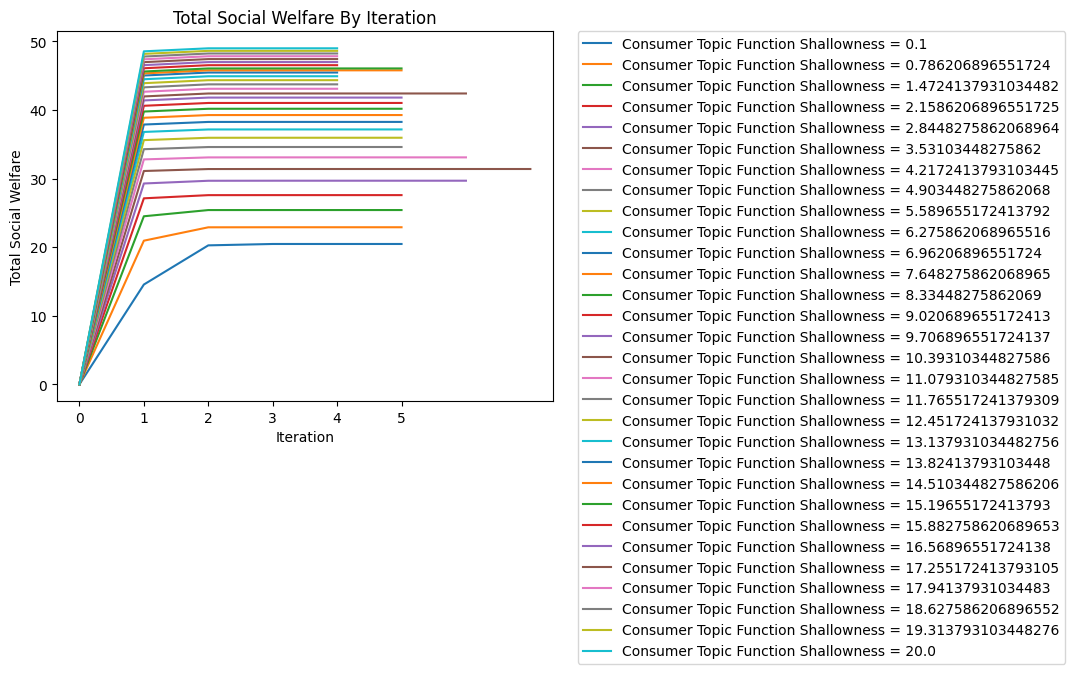

In [11]:
visualize.plot_value_by_iteration_by_test("Total Social Welfare By Iteration", stats['total_social_welfare'], function_mults, varied_param_legend_label, 'Total Social Welfare')

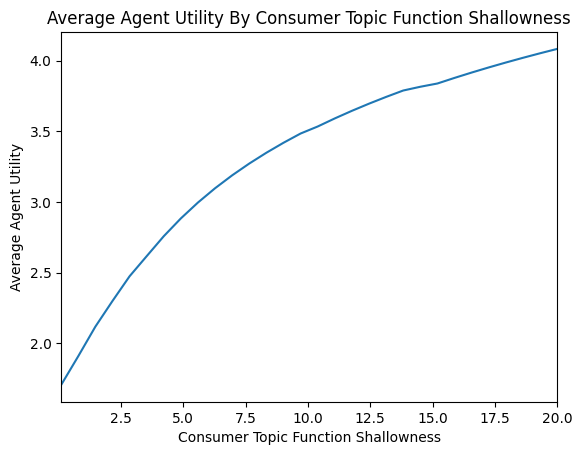

In [12]:
visualize.plot_ending_value_by_test(f"Average Agent Utility By {varied_param_x_label}", stats['average_agent_utilities'], function_mults, varied_param_x_label, 'Average Agent Utility')

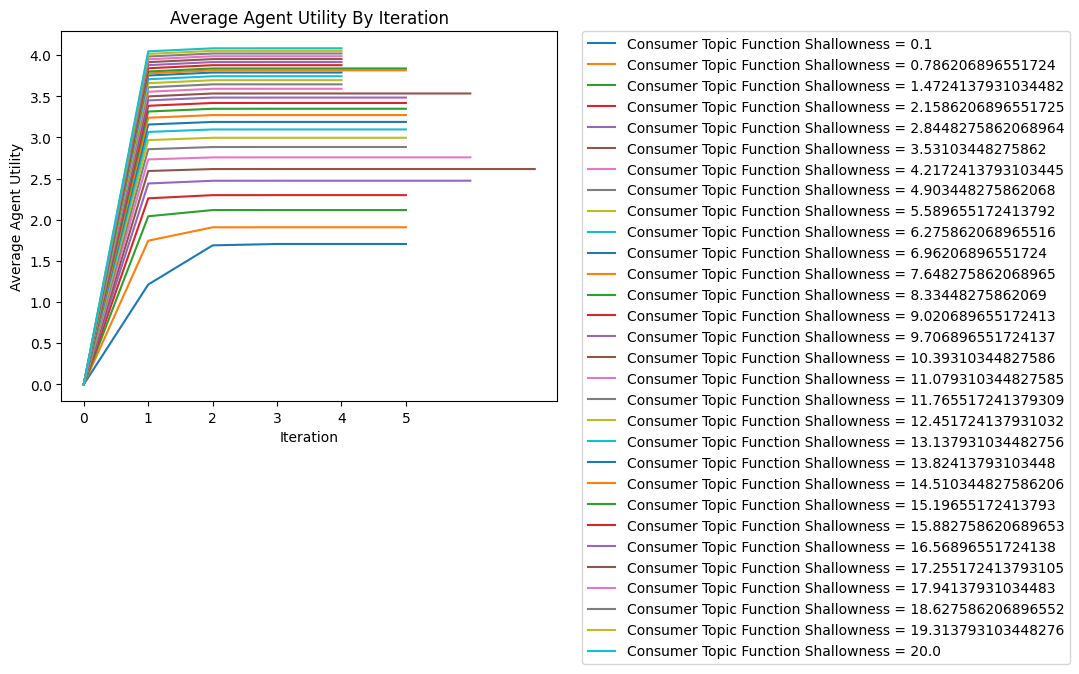

In [13]:
visualize.plot_value_by_iteration_by_test("Average Agent Utility By Iteration", stats['average_agent_utilities'], function_mults, varied_param_legend_label, 'Average Agent Utility')

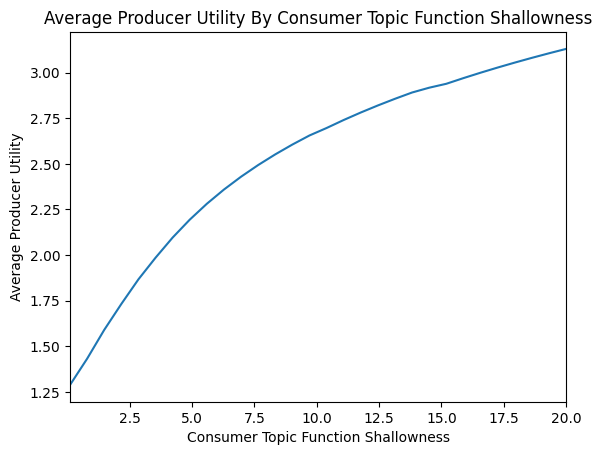

In [14]:
visualize.plot_ending_value_by_test(f"Average Producer Utility By {varied_param_x_label}", stats['average_producer_utilities'], function_mults, varied_param_x_label, 'Average Producer Utility')

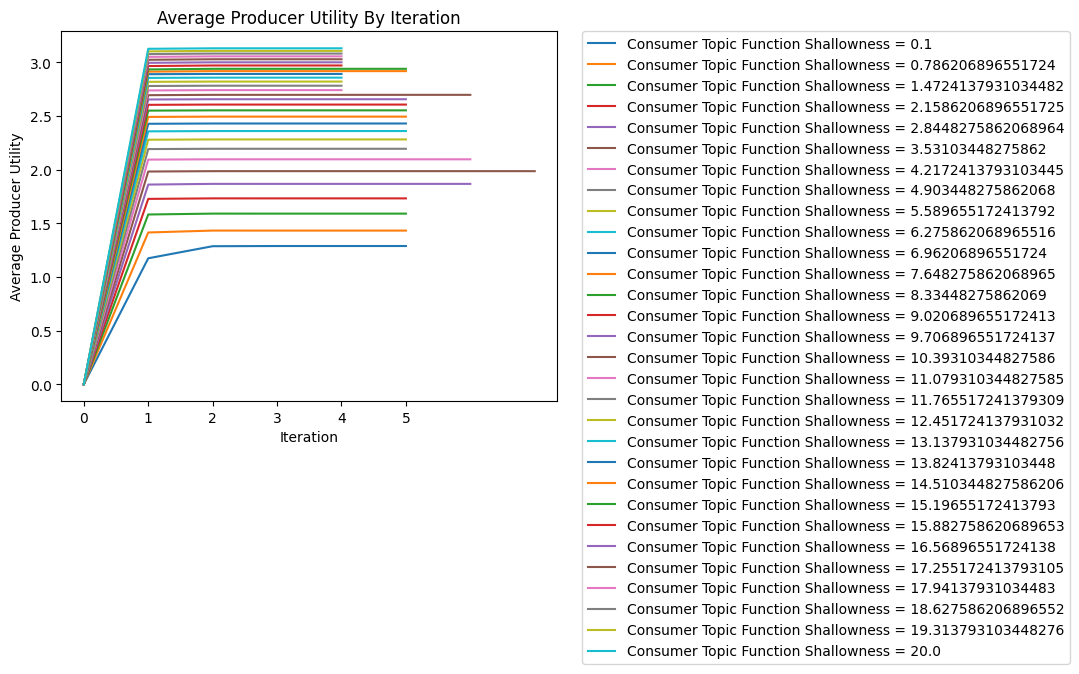

In [15]:
visualize.plot_value_by_iteration_by_test("Average Producer Utility By Iteration", stats['average_producer_utilities'], function_mults, varied_param_legend_label, 'Average Producer Utility')

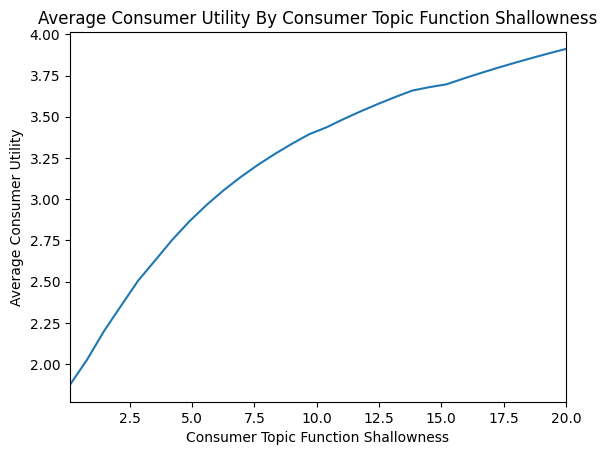

In [16]:
visualize.plot_ending_value_by_test(f"Average Consumer Utility By {varied_param_x_label}", stats['average_consumer_utilities'], function_mults, varied_param_x_label, 'Average Consumer Utility')

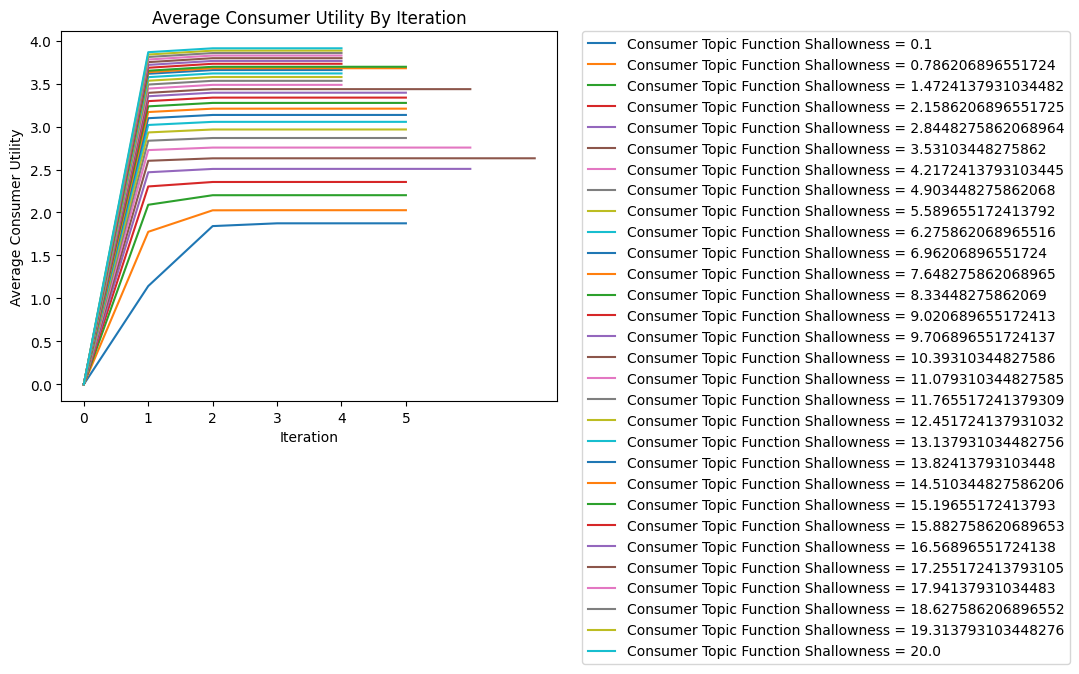

In [17]:
visualize.plot_value_by_iteration_by_test("Average Consumer Utility By Iteration", stats['average_consumer_utilities'], function_mults, varied_param_legend_label, 'Average Consumer Utility')

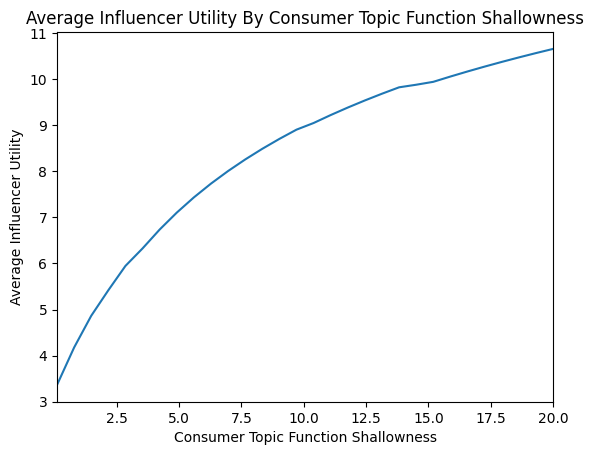

In [18]:
visualize.plot_ending_value_by_test(f"Average Influencer Utility By {varied_param_x_label}", stats['average_influencer_utilities'], function_mults, varied_param_x_label, 'Average Influencer Utility')

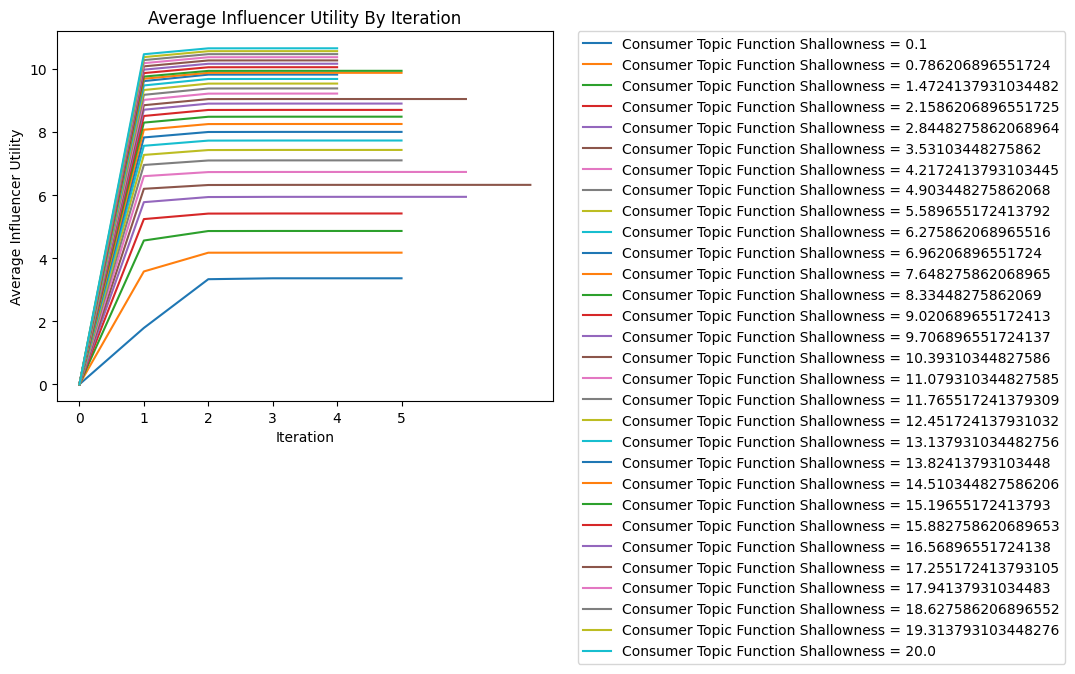

In [19]:
visualize.plot_value_by_iteration_by_test("Average Influencer Utility By Iteration", stats['average_influencer_utilities'], function_mults, varied_param_legend_label, 'Average Influencer Utility')

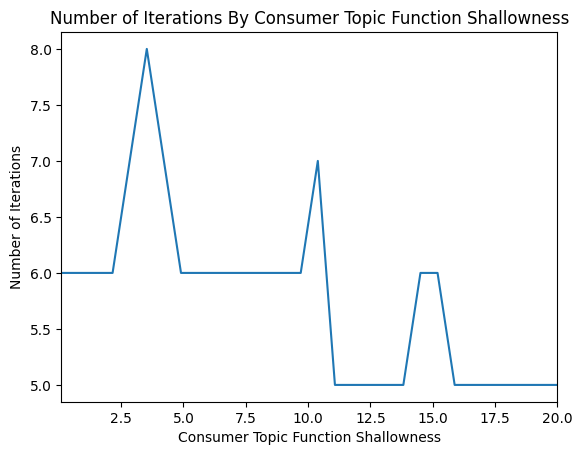

In [20]:
visualize.plot_ending_value_by_test(f"Number of Iterations By {varied_param_x_label}", stats['num_iterations'], function_mults, varied_param_x_label, 'Number of Iterations')